In [ ]:
import pandas as pd
news_df =pd.read_csv("/content/drive/MyDrive/Capstone B/WELFake_Dataset.csv")
news_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
from joblib import dump
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

In [ ]:

news_df = news_df[['text', 'label']]
# %%
news_df_cleaned = news_df.dropna()
# %%
y = news_df_cleaned['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    news_df_cleaned['text'], y, test_size=0.20, random_state=19)

In [ ]:
tfidf_vect = TfidfVectorizer(stop_words="english",max_df=0.7)

In [ ]:
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
news = ["The left believes these are all perfectly acceptable topics to discuss with our young children. Whatever you do, just don t mention God!A public hearing is taking place Wednesday morning in the Massachusetts State House to look into a controversial sex survey given to middle school and high school students.Developed by the Centers for Disease Control and called the  Youth Risk Behavior Survey,  the survey asks students as young as 12 a series of very personal and highly ideological questions.The survey asks students if they are homosexual and if they are transgender. It also asks if they have had oral or anal sex and if they have performed such acts with up to six people.Whether or not they have carried a gun, smoked cigarettes, consumed alcohol and how much also appear on the questionnaire, as well as whether they have taken drugs, such as OxyContin, Percocet, and Vicodin. It asks how often their guardian uses a seat belt, if the youngster has a sexually transmitted disease, and where they sleep.The group MassResistance says the survey is  psychologically distorting  and will lead the child to think he is  abnormal if he is not doing it all.  The group stated that  having children reveal personal issues about themselves and their family can have emotional consequences.  They also complain that  the survey results are used by radical groups from Planned Parenthood to LGBT groups to persuade politicians to give more taxpayer money [to] these groups. Though students fill out the survey anonymously, MassResistance warns that  they are administered by the teacher in the classroom and there is often pressure for all kids to participate. The test is given nationally and not without controversy. The Chicago Tribune reported two years ago that a Chicago teacher was reprimanded for telling students they had a  constitutional right  not to fill out the survey.Via: Breitbart News"]

In [ ]:
news_tfidf = tfidf_vect.transform(news)
prediction = model.predict(news_tfidf)
print(prediction)

[1]


In [ ]:
# After training the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9424370622095846
Confusion Matrix:
 [[6482  493]
 [ 337 7107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6975
           1       0.94      0.95      0.94      7444

    accuracy                           0.94     14419
   macro avg       0.94      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(model, X_test_tfidf, y_test, display_labels=['Real', 'Fake'], cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix')
plt.show()

# Assuming you have stored accuracy values during training
# Plot the accuracy values over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracy_values, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt


ImportError: ignored

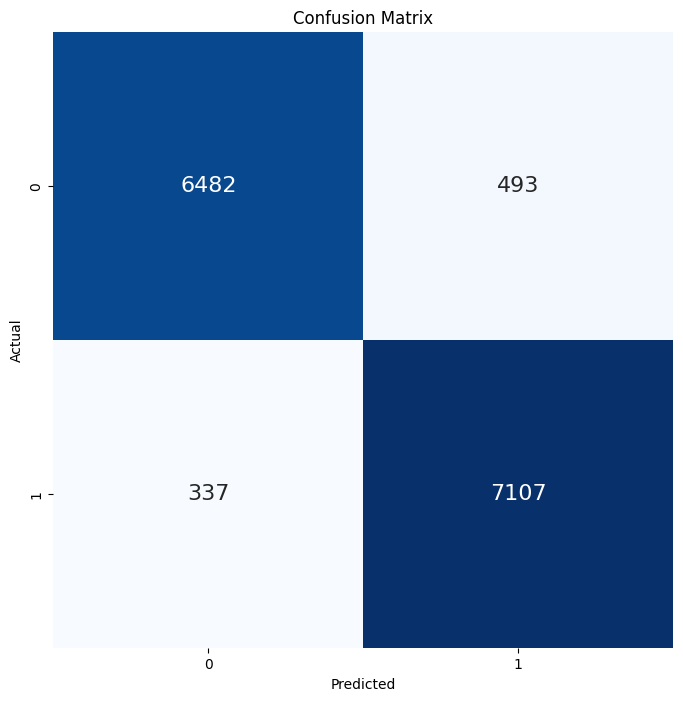

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')


Accuracy: 0.9424370622095846
Precision: 0.9426041916110959
Recall: 0.9424370622095846
F1 Score: 0.9424100167715459
